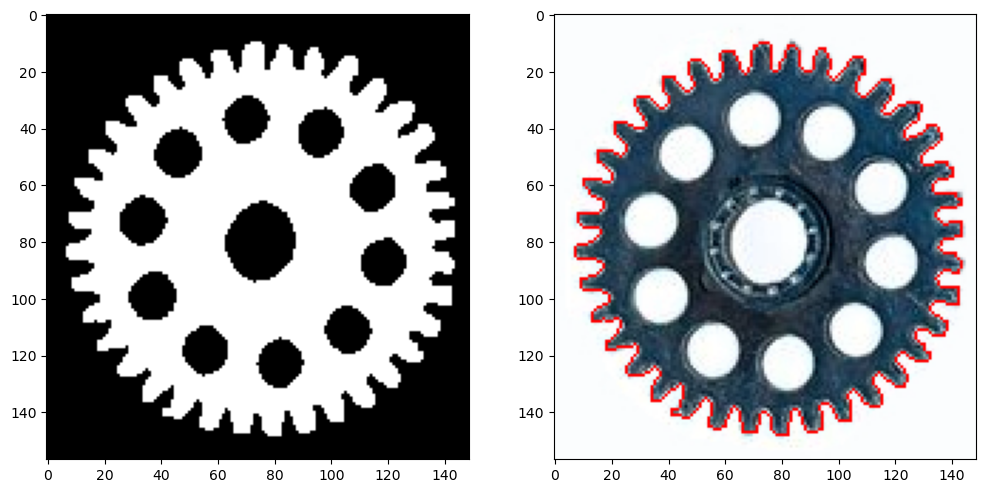

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


trybik = cv2.imread('trybik.jpg')
def draw_contours(img):
    imgG = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgG, 127, 255, cv2.THRESH_BINARY)
    thresh = cv2.erode(thresh, np.ones((3, 3)))
    thresh = cv2.bitwise_not(thresh)


    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,
                                            cv2.CHAIN_APPROX_NONE)

    cv2.drawContours(img, contours, 0, (255, 0, 0))

    f, ax =plt.subplots(1, 2, figsize=(12, 8))
    ax[0].imshow(thresh, 'gray')
    ax[1].imshow(img)

draw_contours(trybik)

In [19]:
import numpy as np

def get_gradients(imgGray):
    sobelx = cv2.Sobel(imgGray, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(imgGray, cv2.CV_64F, 0, 1, ksize=5)
    return sobelx, sobely

def get_gradient_values(sobelx, sobely):
    A = np.sqrt(sobelx**2 + sobely**2)
    A /= np.max(A)

    alfa = np.arctan2(sobely, sobelx)
    alfa = np.degrees(alfa)
    alfa += 180

    return A, alfa

def distance(vector):
    return np.sqrt(vector[0]**2 + vector[1]**2)

def get_R_table(imgG):

    # imgG = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgG, 127, 255, cv2.THRESH_BINARY)
    thresh = cv2.erode(thresh, np.ones((3, 3)))
    thresh = cv2.bitwise_not(thresh)

    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,
                                            cv2.CHAIN_APPROX_NONE)
    
    # contours = contours[0]
    sobelx, sobely = get_gradients(imgG)

    A, alfa = get_gradient_values(sobelx, sobely)

    m_dict = cv2.moments(thresh)
    m00 = m_dict['m00']
    m01 = m_dict['m01']
    m10 = m_dict['m10']
    C = (m10/m00, m01/m00)

    R_table = [[] for _ in range(360)]

    for con in contours:
        for c in con:
            i = tuple(c[0])
            alfa_cur = int(alfa[i] - 1)

            vector = np.array(i) - np.array(C)
            angle_rad = np.arctan2(vector[1], vector[0])
            angle = np.degrees(angle_rad)
            angle += 180

            dist = distance(vector)

            val = (dist, int(angle)-1)
            R_table[alfa_cur].append(val)
            
    return R_table

In [25]:
trybik = cv2.imread('trybik.jpg', 0)
R_table = get_R_table(trybik)
print(R_table[30])

[(65.55137951507157, 357), (52.06275279406346, 7), (38.41662909184563, 89)]


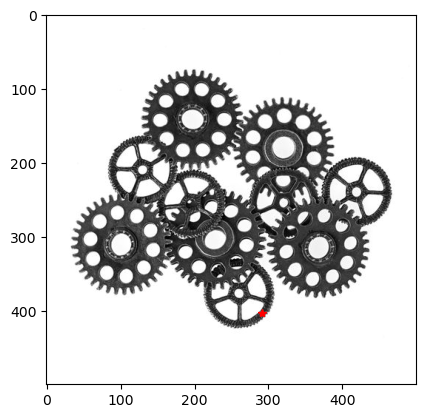

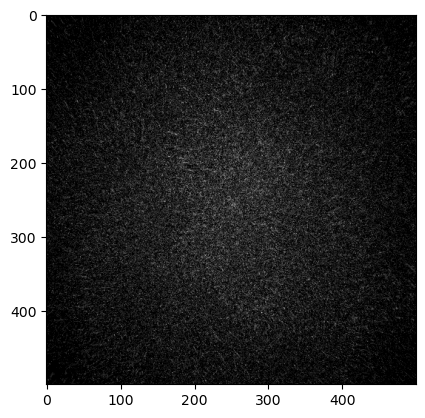

In [34]:
trybiki2 = cv2.imread('trybiki2.jpg', 0)
# trybiki2G = cv2.cvtColor(trybiki2, cv2.COLOR_BGR2GRAY)

R_table = get_R_table(trybiki2)
sobelx2, sobely2 = get_gradients(trybiki2)
A, alfa = get_gradient_values(sobelx2, sobely2)

H = np.zeros(A.shape)
# print(trybiki2.shape)

for y in range(A.shape[0]):
    for x in range(A.shape[1]):
        if A[y, x] > 0.5:
            alfa_cur = alfa[y, x]
            r_values = R_table[int(alfa_cur - 1)]
            for r, fi in r_values:
                x1 = -r*np.cos(fi) + x
                y1 = -r*np.sin(fi) + y
                x1 = int(x1)
                y1 = int(y1)
                # print(x1, y1)
                if 0 < x1 < H.shape[1] and 0 < y1 < H.shape[0]:
                    H[x1, y1] += 1

m_y, m_x = np.where(H.max() == H)
plt.plot([m_x], [m_y], '*', color='r')
plt.imshow(trybiki2, 'gray')
plt.show()
plt.imshow(H, 'gray')
plt.show()
